In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [35]:
points_X, points_Y = make_circles(n_samples=1000, noise=0.1, random_state=15, factor=0.1)

In [116]:
# points_Y

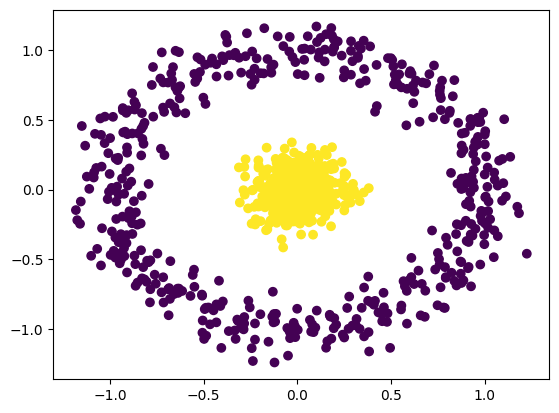

In [37]:
plt.scatter(points_X[:, 0], points_X[:, 1], c = points_Y)

In [38]:
points_X.shape

(1000, 2)

In [42]:
X1 = points_X[:, 0].reshape(-1, 1)
X2 = points_X[:, 1].reshape(-1, 1)
print(X1.shape)
X3 = X1 + X2

print(X3.shape)

(1000, 1)
(1000, 1)


In [43]:
points_X = np.hstack((points_X, X3))

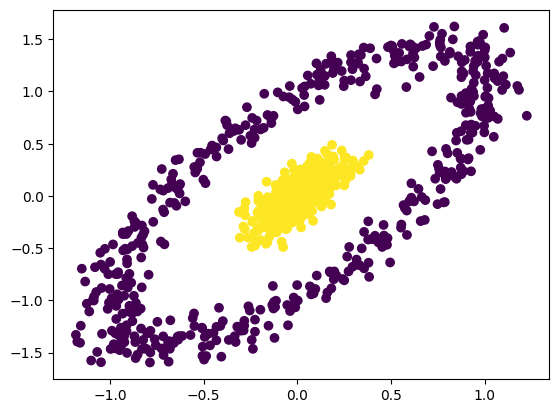

In [44]:
plt.scatter(points_X[:, 0], points_X[:, 2], c = points_Y)

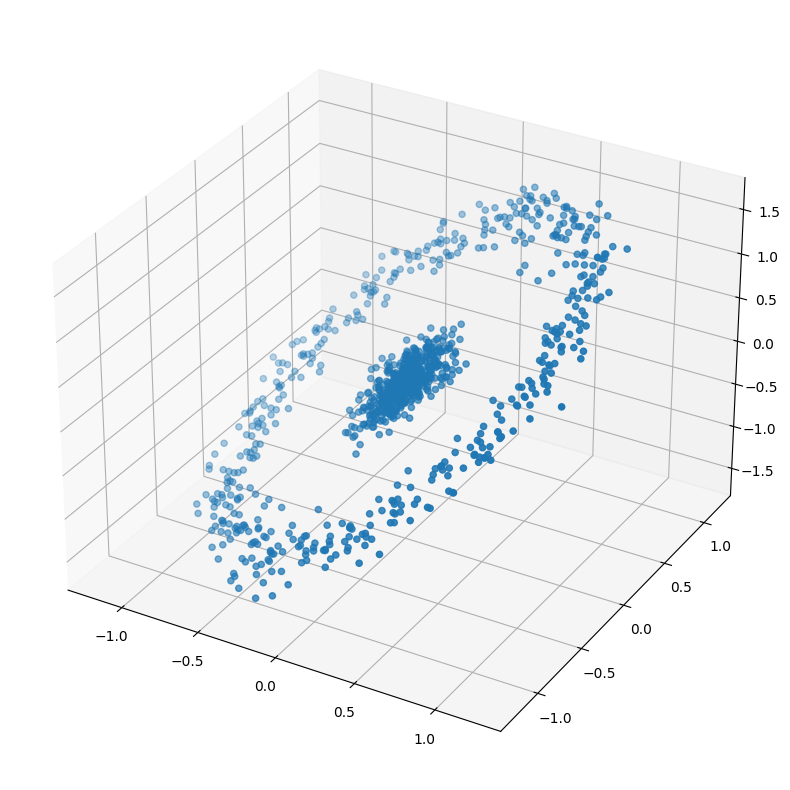

In [98]:
figure = plt.figure(figsize=(10, 10))
ax = figure.add_subplot(projection = '3d')
ax.scatter(points_X[:, 0], points_X[:, 1], points_X[:, 2])

In [149]:
points_X.shape, points_Y.shape

((1000, 3), (1000,))

In [46]:
from sklearn import svm

In [148]:
my_svm = svm.SVC?

In [72]:
my_svm = svm.SVC(kernel='poly', C = 1, degree = 10)
my_svm.fit(points_X, points_Y)

SVC(C=1, degree=10, kernel='poly')

In [73]:
my_svm.score(points_X, points_Y)

0.989

In [80]:
my_svm = svm.SVC(kernel='rbf', C = 1, degree=5)
my_svm.fit(points_X, points_Y)

SVC(C=1, degree=5)

In [81]:
my_svm.score(points_X, points_Y)

1.0

In [99]:
my_svm = svm.SVC(kernel='linear', C = 1, degree=5)
my_svm.fit(points_X, points_Y)

SVC(C=1, degree=5, kernel='linear')

In [100]:
my_svm.score(points_X, points_Y)

0.684

In [101]:
weights = my_svm.coef_
bias = my_svm.intercept_

In [102]:
weights

array([[0.34935658, 0.32168248, 0.67103906]])

In [103]:
mesh_X, mesh_Y = np.meshgrid(points_X[:, 0], points_X[:, 1])

In [105]:
plane = -(weights[0][0]*points_X[:, 0] + weights[0][1]*points_X[:, 1] + bias)/weights[0][2]

In [145]:
print(plane.reshape(-1, 1).shape)
print(points_X[:, 0].shape)
p = np.array(np.meshgrid(points_X[:, 0], plane))
print(p.shape)

(1000, 1)
(1000,)
(2, 1000, 1000)


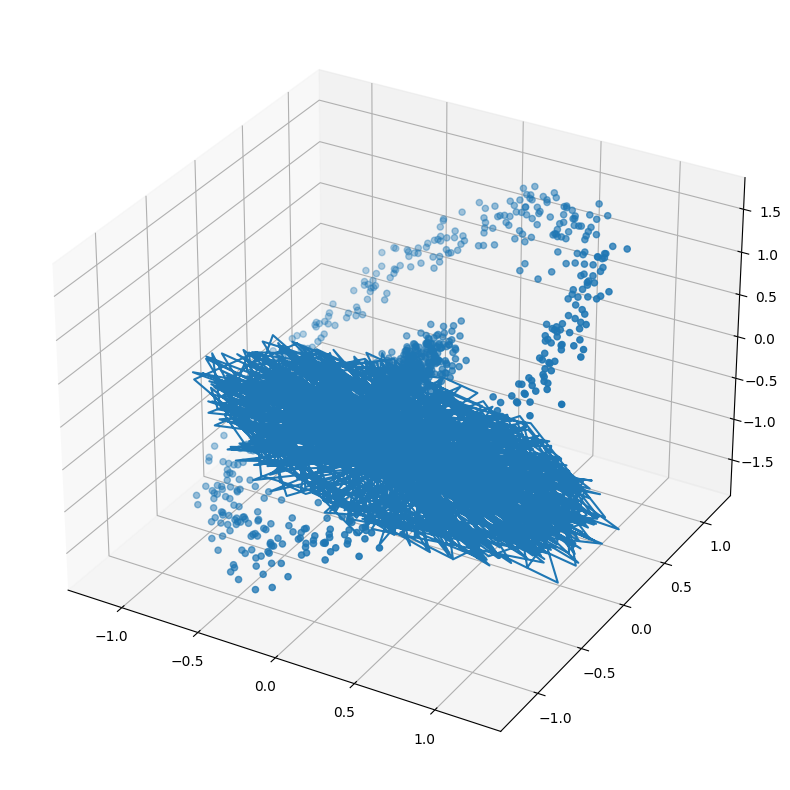

In [147]:
figure = plt.figure(figsize=(10, 10))
ax = figure.add_subplot(projection = '3d')
ax.scatter(points_X[:, 0], points_X[:, 1], points_X[:, 2])
# plane_mesh = np.meshgrid(points_X[:, 0].reshape(-1, 1), plane.reshape(-1, 1))
# plane_mesh = np.array(plane_mesh)
# print(np.array(plane_mesh).shape)
ax.plot(points_X[:, 0], points_X[:, 1], plane)